In [ ]:
!mkdir images


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


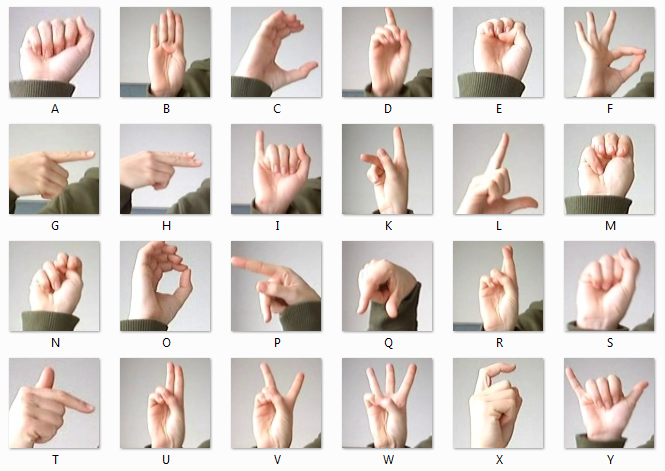

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/Sign Language Interpretor Dataset/amer_sign2.png", width= 800, height=500)


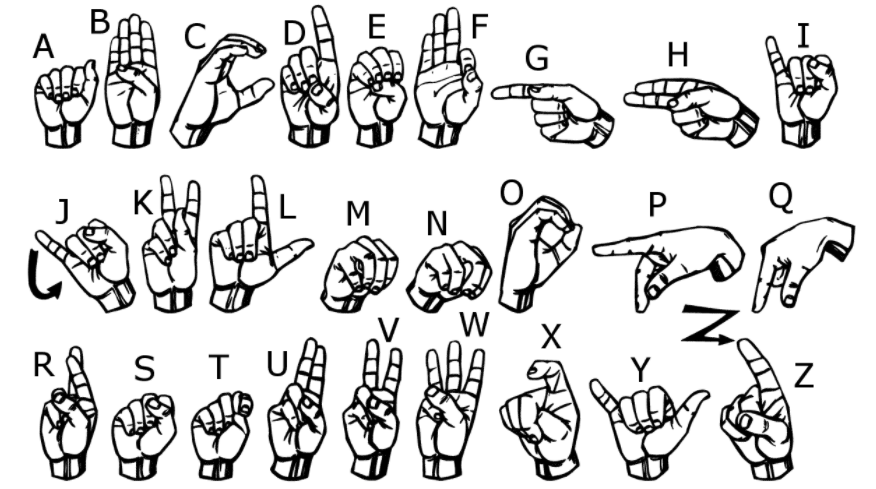

In [ ]:
from IPython.display import Image
Image(filename="/content/drive/MyDrive/Sign Language Interpretor Dataset/american_sign_language.PNG", width= 800, height=500)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
from sklearn import metrics 
from sklearn.decomposition import PCA

### **Loading the data**

In [ ]:
!mkdir input


In [ ]:
train_dataframe = pd.read_csv("/content/drive/MyDrive/Sign Language Interpretor Dataset/sign_mnist_train.csv")

In [ ]:
test_dataframe = pd.read_csv("/content/drive/MyDrive/Sign Language Interpretor Dataset/sign_mnist_test.csv")

### Familiarizing with Data

In [ ]:
train_dataframe.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
train_dataframe.shape

(27455, 785)

In [ ]:
train_dataframe.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
labels=train_dataframe.label.unique()
np.sort(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [ ]:
train_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
label,27455.0,12.318813,7.287552,0.0,6.0,13.0,19.0,24.0
pixel1,27455.0,145.419377,41.358555,0.0,121.0,150.0,174.0,255.0
pixel2,27455.0,148.500273,39.942152,0.0,126.0,153.0,176.0,255.0
pixel3,27455.0,151.247714,39.056286,0.0,130.0,156.0,178.0,255.0
pixel4,27455.0,153.546531,38.595247,0.0,133.0,158.0,179.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,27455.0,162.736696,63.444008,0.0,125.0,184.0,207.0,255.0
pixel781,27455.0,162.906137,63.509210,0.0,128.0,184.0,207.0,255.0
pixel782,27455.0,161.966454,63.298721,0.0,128.0,182.0,206.0,255.0
pixel783,27455.0,161.137898,63.610415,0.0,128.0,182.0,204.0,255.0


In [ ]:
test_dataframe.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
test_dataframe.shape


(7172, 785)

In [ ]:
test_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [ ]:
test_dataframe.isna().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

In [ ]:
test_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
label,7172.0,11.247351,7.446712,0.0,4.00,11.0,18.0,24.0
pixel1,7172.0,147.532627,43.593144,0.0,122.00,154.0,178.0,255.0
pixel2,7172.0,150.445761,41.867838,0.0,126.00,157.0,179.0,255.0
pixel3,7172.0,153.324317,40.442728,0.0,130.00,159.0,181.0,255.0
pixel4,7172.0,155.663413,39.354776,0.0,134.00,161.0,182.0,255.0
...,...,...,...,...,...,...,...,...
pixel780,7172.0,159.648494,65.499368,0.0,113.75,182.0,208.0,255.0
pixel781,7172.0,158.162019,66.493576,0.0,113.00,181.0,207.0,255.0
pixel782,7172.0,157.672755,66.009690,0.0,115.00,180.0,205.0,255.0
pixel783,7172.0,156.664250,67.202939,0.0,111.00,180.0,206.0,255.0


### **Converting the pandas Dataframe into Numpy Arrays**

In [ ]:
inputs_array_train = train_dataframe.iloc[:, 1:].to_numpy()
targets_array_train = train_dataframe['label'].to_numpy()
inputs_array_test = test_dataframe.iloc[:, 1:].to_numpy()
targets_array_test = test_dataframe['label'].to_numpy()

### **Visualizing the data**

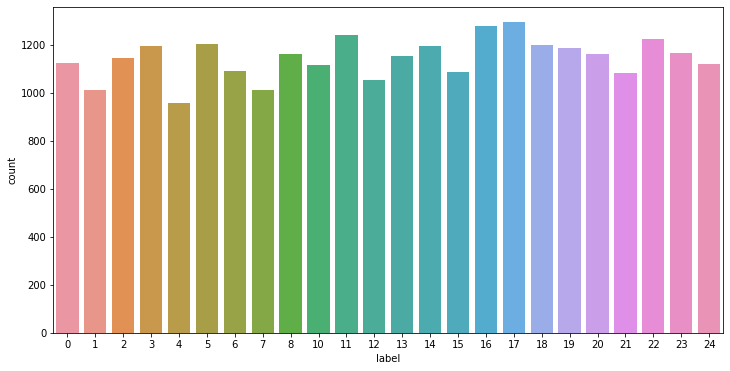

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="label",data=train_dataframe);

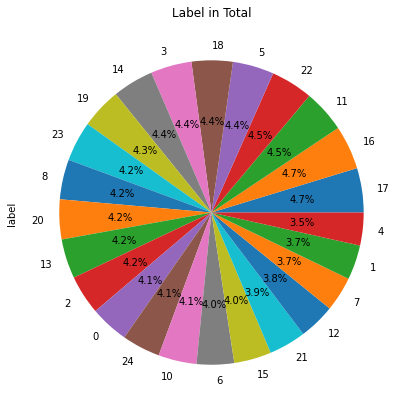

In [ ]:
train_dataframe['label'].value_counts().plot(kind='pie',autopct='%1.1f%%',figsize=(7,7))
plt.title("Label in Total")
plt.show()

In [ ]:
def Show_Train_Image(row):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
    fig.figsize=(1,1)
    img =np.reshape(inputs_array_train[row], (28, 28))
    print("Actual Label : ",chr(ord('A')+targets_array_train[row]))
    ax1.set_title("Original Image")
    ax1.axis("off")
    ax1.imshow(img);
    ax2.axis("off")
    ax2.set_title("Gray Image")
    ax2.imshow(img,cmap='gray');


 

def Show_Test_Image(row,y_test):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,10))
    fig.figsize=(1,1)
    img =np.reshape(inputs_array_train[row], (28, 28))
    print("Actual Label : ",chr(ord('A')+targets_array_train[row]))
    print("Predicted Label : ",chr(ord('A')+y_test[row]))
    ax1.set_title("Original Image")
    ax1.axis("off")
    ax1.imshow(img);
    ax2.axis("off")
    ax2.set_title("Gray Image")
    ax2.imshow(img,cmap='gray');

Actual Label :  H


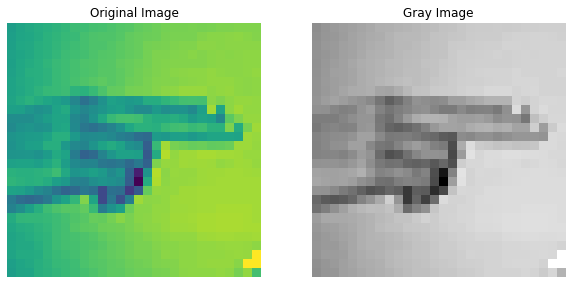

In [ ]:
Show_Train_Image(345)

Actual Label :  D


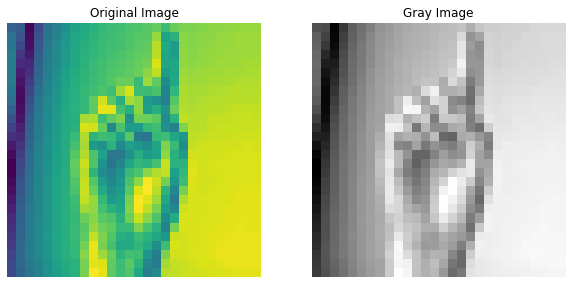

In [ ]:
Show_Train_Image(3256)

### **Data Preprocessing**






In [ ]:
#Normalization
X_train=inputs_array_train/255
X_test=inputs_array_test/255

y_train = targets_array_train  
y_test  = targets_array_test

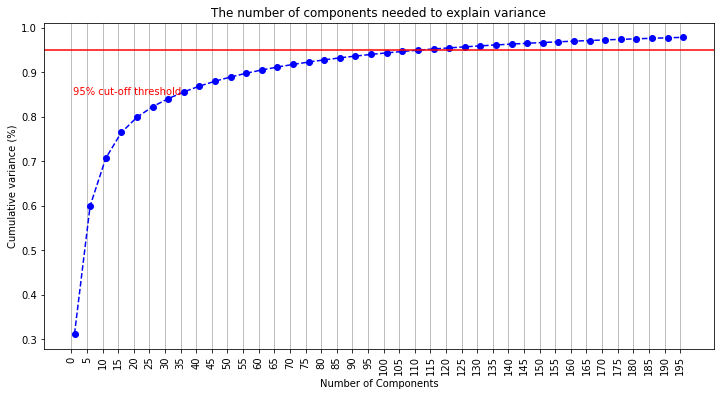

The number of components needed to explain variance :  113


In [ ]:
pca = PCA().fit(X_train)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
x = np.arange(1, 785, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.plot(x[:200:5], y[:200:5], marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 200, step=5),rotation=90)
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red')

ax.grid(axis='x')
plt.show()

for i,j in zip(x,y):
    if(j>0.95):
        print('The number of components needed to explain variance : ',i)
        break

### **Model Building**





Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under classification problem, as the classification of sign Language are categorical problem in term of machine learning. The supervised machine learning models (classification) considered to train the dataset in this notebook are:

Logistic Regression
Decision Tree
Support Vector Machine
Random Forest
Naive Bayes Classifier
k-Nearest Neighbors
The metrics considered to evaluate the model performance are Accuracy, Classification_report & Confusion Matrix.

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **Logistic Regression**
Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.

In [ ]:
# Logistic regression model 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# instantiate the model
log = Pipeline([('reduce_dims', PCA(n_components=113)),
                ('model', LogisticRegression(multi_class="multinomial" ,random_state = 0))])

# fit the model 
log.fit(X_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model',
                 LogisticRegression(multi_class='multinomial',
                                    random_state=0))])

In [ ]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

### **Performance Evaluation**

In [ ]:
#computing the accuracy of the model performance
acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression: Accuracy on test Data: {:.3f}".format(acc_test_log))

Logistic Regression : Accuracy on training Data: 0.999
Logistic Regression: Accuracy on test Data: 0.680


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       331
           1       1.00      0.81      0.89       432
           2       0.92      0.92      0.92       310
           3       0.82      0.71      0.76       245
           4       0.85      0.91      0.88       498
           5       0.58      0.91      0.71       247
           6       0.86      0.72      0.78       348
           7       0.83      0.67      0.74       436
           8       0.76      0.74      0.75       288
          10       0.50      0.30      0.38       331
          11       0.54      0.90      0.67       209
          12       0.67      0.61      0.64       394
          13       0.70      0.52      0.60       291
          14       0.99      0.66      0.79       246
          15       0.89      0.93      0.91       347
          16       0.60      0.74      0.66       164
          17       0.19      0.43      0.26       144
          18       0.30    

<Figure size 720x720 with 0 Axes>

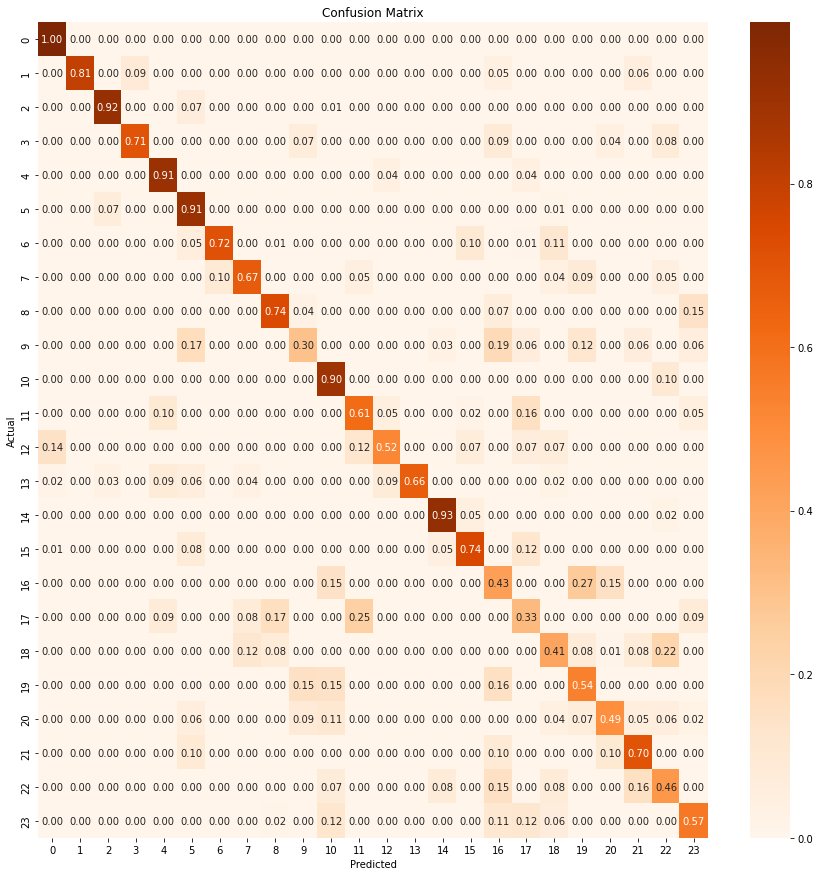

In [ ]:
plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_log)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

### **Storing Results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Logistic Regression',acc_train_log, acc_test_log)

### Storing Model:

In [ ]:
!mkdir model

In [ ]:
# storing model for future use
import joblib
joblib.dump(log,'model/logistic_model')

['model/logistic_model']

Actual Label :  N
Predicted Label :  F


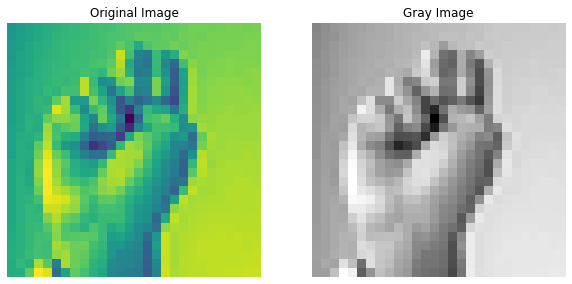

In [ ]:
# Checking Image for Actual and Preicted Label
Show_Test_Image(3252,y_test_log)

Actual Label :  C
Predicted Label :  P


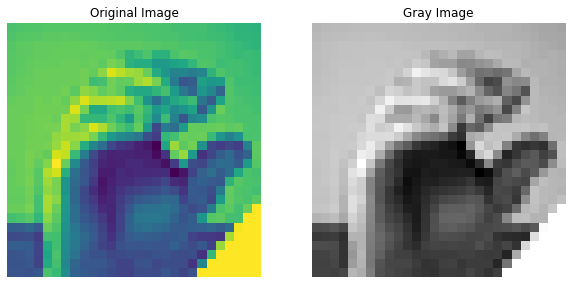

In [ ]:
# Checking Image for Actual and Preicted Label
Show_Test_Image(246,y_test_log)

### OBSERVATIONS:
The model performance is not very good, we can see that there is huge difference between accuracy on the training and test sets. This means we are likely overfitting.

### Decision Trees : Classifier###
Decision Tree is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

In [ ]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

# instantiate the model 
tree = Pipeline([('reduce_dims', PCA(n_components=113)),
                 ('model', DecisionTreeClassifier(max_depth=30))])

# fit the model 
tree.fit(X_train, y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model', DecisionTreeClassifier(max_depth=30))])

In [ ]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

**Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)


print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree : Accuracy on training Data: 0.996
Decision Tree : Accuracy on test Data: 0.396


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.55      0.76      0.64       331
           1       0.63      0.58      0.61       432
           2       0.73      0.57      0.64       310
           3       0.36      0.49      0.42       245
           4       0.53      0.51      0.52       498
           5       0.42      0.54      0.47       247
           6       0.56      0.47      0.51       348
           7       0.65      0.54      0.59       436
           8       0.29      0.48      0.36       288
          10       0.11      0.08      0.09       331
          11       0.41      0.43      0.42       209
          12       0.21      0.15      0.18       394
          13       0.08      0.07      0.07       291
          14       0.41      0.54      0.46       246
          15       0.76      0.54      0.63       347
          16       0.49      0.44      0.46       164
          17       0.14      0.39      0.21       144
          18       0.31    

<Figure size 720x720 with 0 Axes>

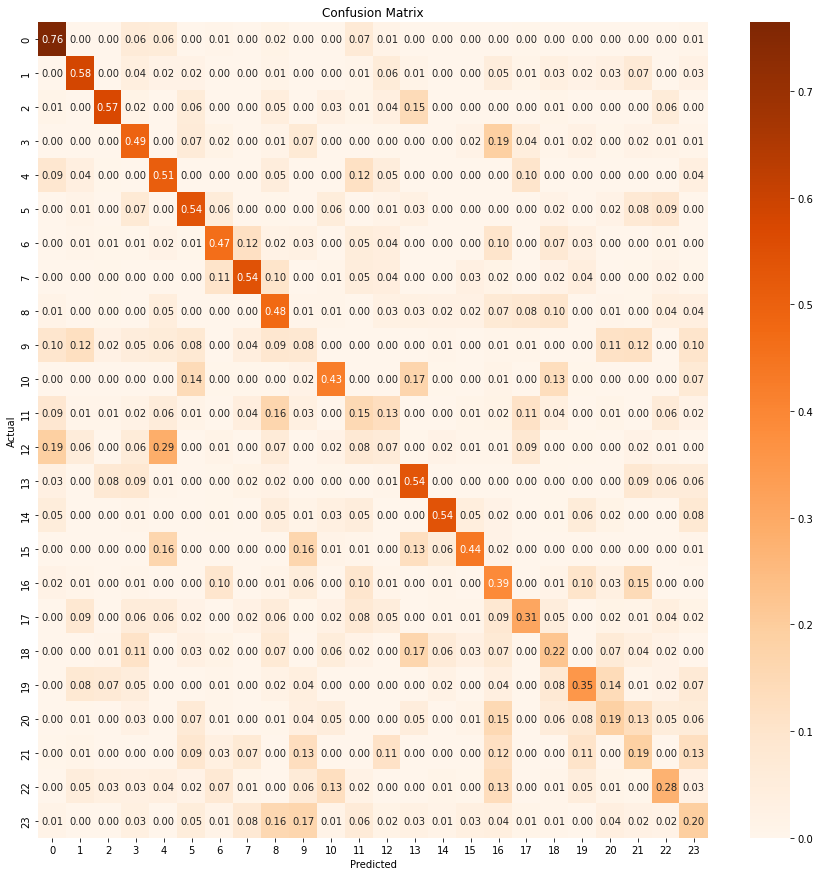

In [ ]:
#visualization of Confusion Matrix 

plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_tree)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

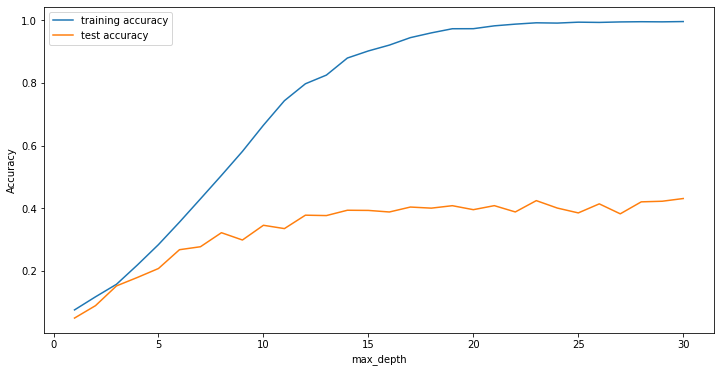

In [ ]:

training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,31)
for n in depth:
    tree_test = Pipeline([('reduce_dims', PCA(n_components=113)),
                    ('model', DecisionTreeClassifier(max_depth=n))])

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

**Storing Results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Decision Tree',acc_train_tree, acc_test_tree)

### Storing Models:

In [ ]:
# storing model for future use
import joblib
joblib.dump(tree,'model/tree_model')

['model/tree_model']

Actual Label :  C
Predicted Label :  P


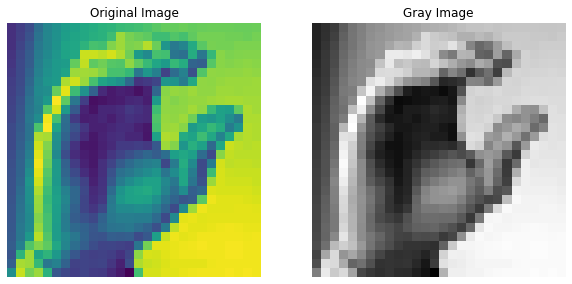

In [ ]:
# Checking Image for Actual and Preicted Label
Show_Test_Image(3253,y_test_tree)

Actual Label :  R
Predicted Label :  L


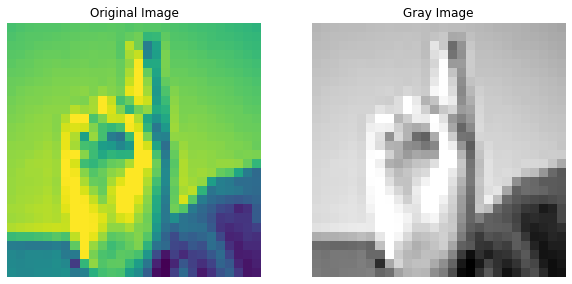

In [ ]:
# Checking Image for Actual and Preicted Label
Show_Test_Image(2356,y_test_tree)

### OBSERVATIONS:
The accuracy of training set and testing set is not so great for max_depth<15. As max_depth increases model lead to overfitting. So, moving on to the other models.

### **Support Vector Machine : Classifier**
Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future.

In [ ]:
# Support Vector Classifier model 
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# instantiate the model
svc= Pipeline([('reduce_dims', PCA(n_components=113)),('model', SVC())])

# fit the model 
svc.fit(X_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)), ('model', SVC())])

In [ ]:
#predicting the target value from the model for the samples
y_train_svc = svc.predict(X_train)
y_test_svc = svc.predict(X_test)

### **Performance Evaluation**

In [ ]:

#computing the accuracy of the model performance
acc_train_svc = metrics.accuracy_score(y_train,y_train_svc)
acc_test_svc = metrics.accuracy_score(y_test,y_test_svc)

print("Support Vector Machine : Accuracy on training Data: {:.3f}".format(acc_train_svc))
print("Support Vector Machine : Accuracy on test Data: {:.3f}".format(acc_test_svc))

Support Vector Machine : Accuracy on training Data: 1.000
Support Vector Machine : Accuracy on test Data: 0.853


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_svc))

              precision    recall  f1-score   support

           0       0.91      1.00      0.96       331
           1       1.00      0.99      1.00       432
           2       0.87      0.99      0.92       310
           3       0.92      1.00      0.96       245
           4       0.95      0.99      0.97       498
           5       0.75      0.83      0.79       247
           6       0.94      0.91      0.92       348
           7       0.97      0.94      0.96       436
           8       0.81      0.90      0.85       288
          10       0.80      0.66      0.73       331
          11       0.87      0.99      0.93       209
          12       0.85      0.74      0.80       394
          13       0.90      0.68      0.77       291
          14       0.99      0.85      0.91       246
          15       1.00      1.00      1.00       347
          16       1.00      1.00      1.00       164
          17       0.35      0.61      0.44       144
          18       0.74    

<Figure size 720x720 with 0 Axes>

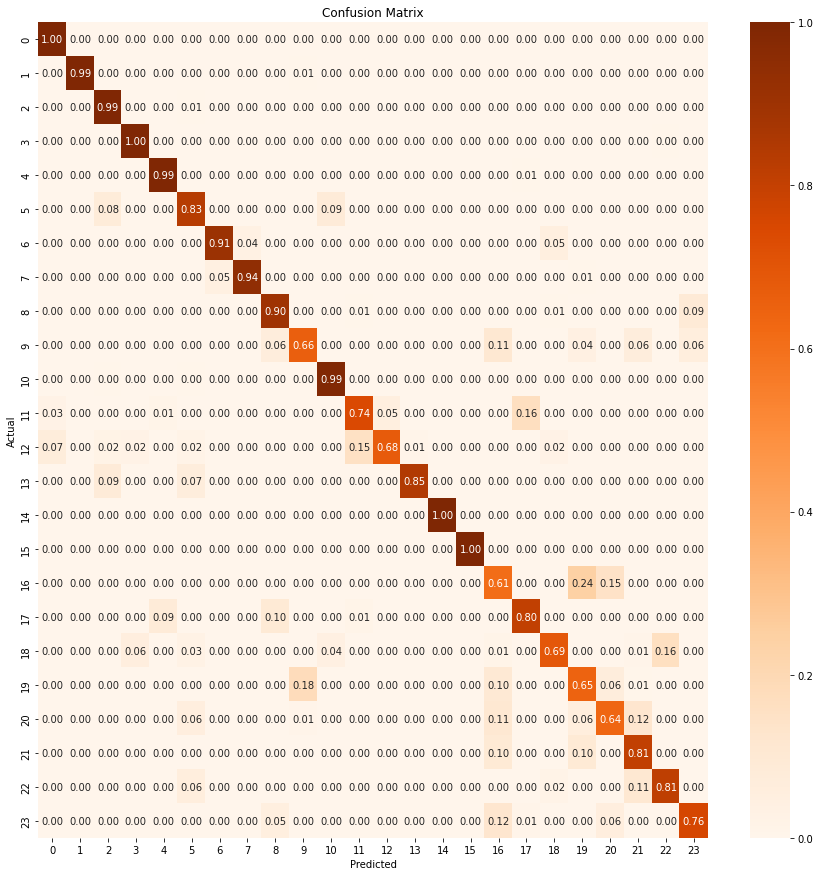

In [ ]:
#visualization of Confusion Matrix 

plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_svc)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

### Storing Result

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Support Vector Machine',acc_train_svc, acc_test_svc)

### Storing Model

In [ ]:
# storing model for future use
import joblib
joblib.dump(svc,'model/SVM_model')

['model/SVM_model']

Actual Label :  V
Predicted Label :  M


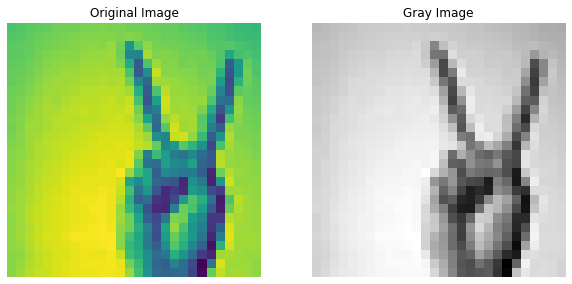

In [ ]:
# Checking Image for Actual and Preicted Label
Show_Test_Image(1214,y_test_svc)

Actual Label :  H
Predicted Label :  I


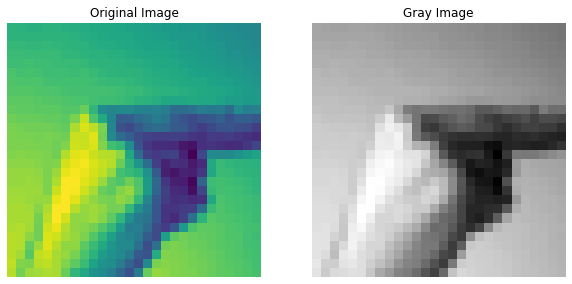

In [ ]:
# Checking Image for Actual and Preicted Label
Show_Test_Image(3233,y_test_svc)

### **OBSERVATIONS:**
The model accuracy obtained is 86%, it is clear that the model performs very well on training as well as testing dataset. This may or may not be the case of overfitting.

### **Random Forest : Classifier**
Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of ensemble learning, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# instantiate the model
forest = Pipeline([('reduce_dims', PCA(n_components=113)),
                ('model', RandomForestClassifier(n_estimators=100))])

# fit the model 
forest.fit(X_train,y_train)
Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model', RandomForestClassifier())])
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [ ]:
#computing the accuracy of the model performance
acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)

print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random Forest : Accuracy on training Data: 1.000
Random Forest : Accuracy on test Data: 0.773


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92       331
           1       0.94      0.93      0.93       432
           2       0.82      0.97      0.89       310
           3       0.84      0.92      0.88       245
           4       0.89      0.95      0.92       498
           5       0.87      0.91      0.89       247
           6       0.88      0.81      0.84       348
           7       0.92      0.90      0.91       436
           8       0.71      0.70      0.71       288
          10       0.66      0.58      0.62       331
          11       0.81      1.00      0.90       209
          12       0.79      0.62      0.70       394
          13       0.71      0.44      0.54       291
          14       0.96      0.75      0.84       246
          15       0.98      0.99      0.99       347
          16       0.81      0.94      0.87       164
          17       0.27      0.47      0.34       144
          18       0.60    

<Figure size 720x720 with 0 Axes>

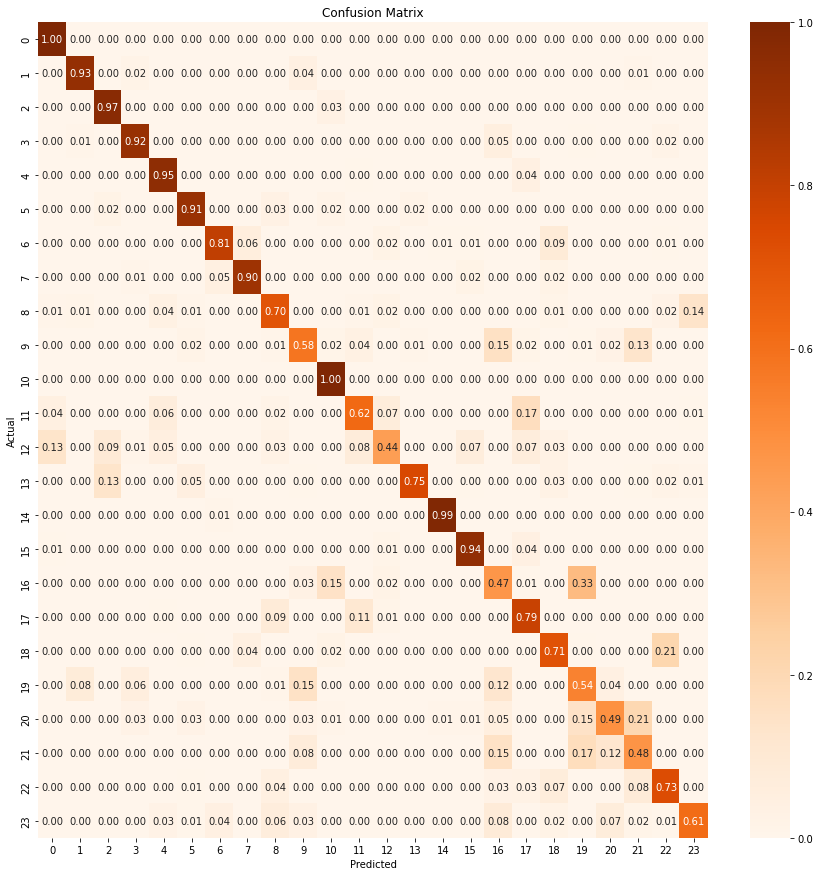

In [ ]:
#visualization of Confusion Matrix 

plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_forest)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

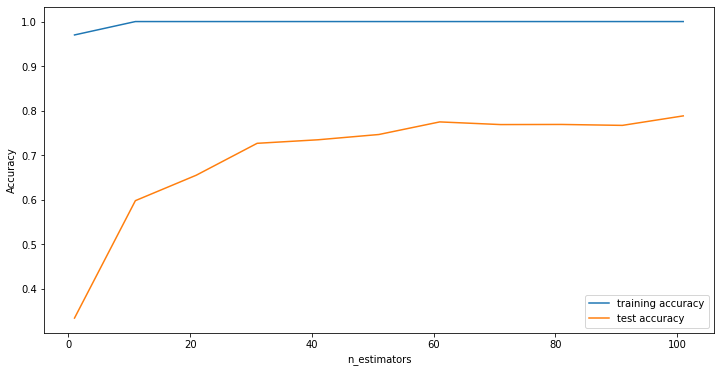

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 100
depth = range(1,102,10)
for n in depth:
    forest_test = Pipeline([('reduce_dims', PCA(n_components=113)),
                       ('model', RandomForestClassifier(n_estimators=n))])

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 100
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend()

### Storing Result:

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Random Forest',acc_train_forest, acc_test_forest)

### Storing Model:

In [ ]:
# storing model for future use
import joblib
joblib.dump(forest,'model/forest_model')

['model/forest_model']

Actual Label :  P
Predicted Label :  U


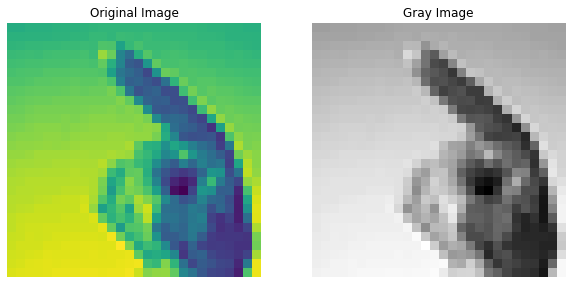

In [ ]:
# Checking Image for Actual and Preicted Label
Show_Test_Image(6532,y_test_forest)

Actual Label :  C
Predicted Label :  S


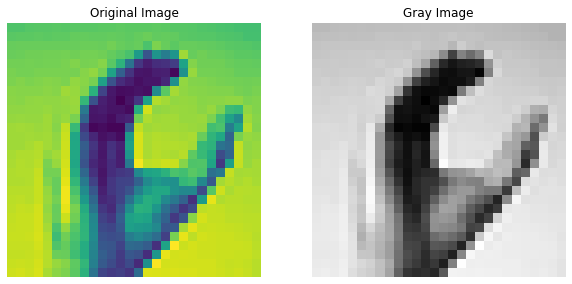

In [ ]:
# Checking Image for Actual and Preicted Label
Show_Test_Image(32,y_test_forest)

### **OBSERVATIONS:**
From the above graph, it is clear that, the model is overfitting for n_estimators<20 . As n_estimators increases model accuracy for training set move towards 99% and for testing set it is nearly 82%. This model perform well for n_estimators>60.

### **Naive Bayes : Classifier**
Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text, image classification that includes a high-dimensional training dataset. Naïve Bayes Classifier is one of the simple and most effective Classification algorithms which helps in building the fast machine learning models that can make quick predictions.

In [ ]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb= Pipeline([('reduce_dims', PCA(n_components=113)),('model', GaussianNB())])

# fit the model 
nb.fit(X_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model', GaussianNB())])

In [ ]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

## **Performance Evaluation:**

In [ ]:
#computing the accuracy of the model performance
acc_train_nb =  metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb =  metrics.accuracy_score(y_test,y_test_nb)

print("Naive Bayes : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes : Accuracy on test Data: {:.3f}".format(acc_test_nb))

Naive Bayes : Accuracy on training Data: 0.794
Naive Bayes : Accuracy on test Data: 0.620


In [ ]:
print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87       331
           1       0.95      0.84      0.89       432
           2       1.00      0.76      0.87       310
           3       0.67      0.73      0.70       245
           4       0.86      0.77      0.81       498
           5       0.62      0.64      0.63       247
           6       0.82      0.62      0.71       348
           7       0.99      0.77      0.87       436
           8       0.58      0.52      0.55       288
          10       0.66      0.42      0.51       331
          11       0.75      0.78      0.77       209
          12       0.73      0.49      0.58       394
          13       0.38      0.35      0.37       291
          14       0.87      0.71      0.78       246
          15       0.73      0.49      0.59       347
          16       0.30      0.85      0.44       164
          17       0.22      0.65      0.33       144
          18       0.36    

<Figure size 720x720 with 0 Axes>

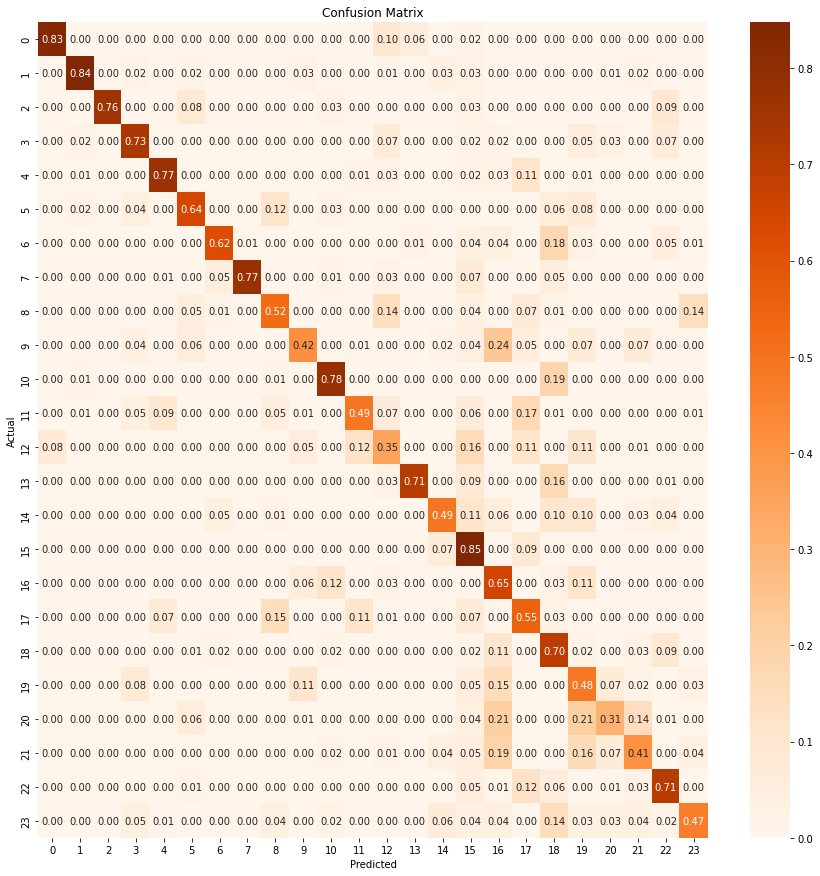

In [ ]:
#visualization of Confusion Matrix 

plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_nb)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

## **Storing Results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('Naive Bayes',acc_train_nb, acc_test_nb)


## **Storing Model:**

In [ ]:
# storing model for future use
import joblib
joblib.dump(nb,'model/naive_bayes_model')

['model/naive_bayes_model']

Actual Label :  P
Predicted Label :  U


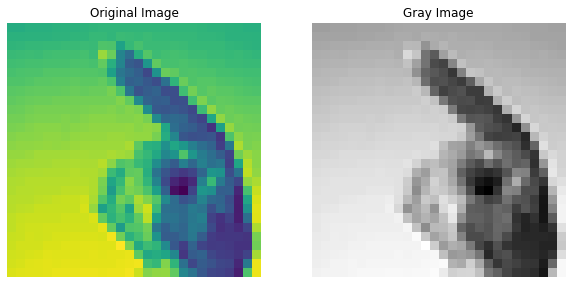

In [ ]:
# Checking Image for Actual and Preicted Label
Show_Test_Image(6532,y_test_nb)

Actual Label :  X
Predicted Label :  P


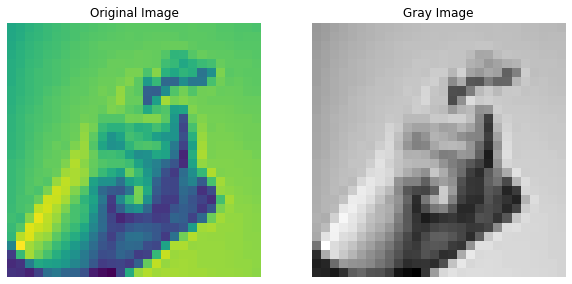

In [ ]:
# Checking Image for Actual and Preicted Label
Show_Test_Image(25,y_test_nb)

## **OBSERVATIONS:**
The model didn't overfit as such when trained without tuning any parameters. But, the model accuracy obtained is 79 % for training set and 60% for testing set, which is not so good.

### **K-Nearest Neighbors : Classifier**
K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique. K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.

In [ ]:
# K-Nearest Neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# instantiate the model
knn = Pipeline([('reduce_dims', PCA(n_components=113)),('model', KNeighborsClassifier())])

# fit the model 
knn.fit(X_train,y_train)

Pipeline(steps=[('reduce_dims', PCA(n_components=113)),
                ('model', KNeighborsClassifier())])

In [ ]:
#predicting the target value from the model for the samples
y_train_knn = knn.predict(X_train)
y_test_knn = knn.predict(X_test)

### **Performace Evaluation**

In [ ]:
#computing the accuracy of the model performance
acc_train_knn = metrics.accuracy_score(y_train,y_train_knn)
acc_test_knn = metrics.accuracy_score(y_test,y_test_knn)

print("K neighest neighbour : Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("K neighest neighbour : Accuracy on test Data: {:.3f}".format(acc_test_knn))

K neighest neighbour : Accuracy on training Data: 0.999
K neighest neighbour : Accuracy on test Data: 0.815


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_knn))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       331
           1       0.95      0.93      0.94       432
           2       0.97      1.00      0.98       310
           3       0.76      0.94      0.84       245
           4       0.80      0.97      0.87       498
           5       0.89      0.93      0.91       247
           6       0.91      0.94      0.92       348
           7       0.96      0.95      0.96       436
           8       0.88      0.69      0.77       288
          10       0.87      0.60      0.71       331
          11       0.95      0.93      0.94       209
          12       0.79      0.52      0.63       394
          13       0.79      0.63      0.70       291
          14       1.00      0.93      0.97       246
          15       0.99      1.00      1.00       347
          16       0.94      1.00      0.97       164
          17       0.33      0.62      0.43       144
          18       0.67    

<Figure size 720x720 with 0 Axes>

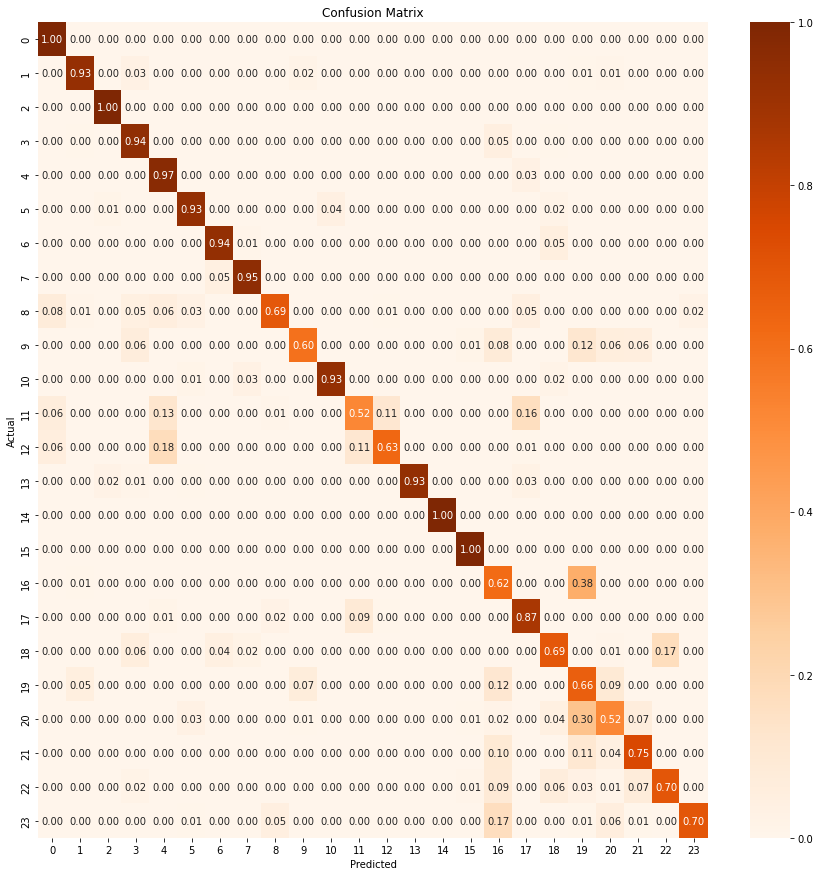

In [ ]:
#visualization of Confusion Matrix 

plt.figure(figsize=(10,10))
cm=metrics.confusion_matrix(y_test,y_test_knn)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cmn, annot=True, fmt='.2f',cmap='Oranges')
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False);

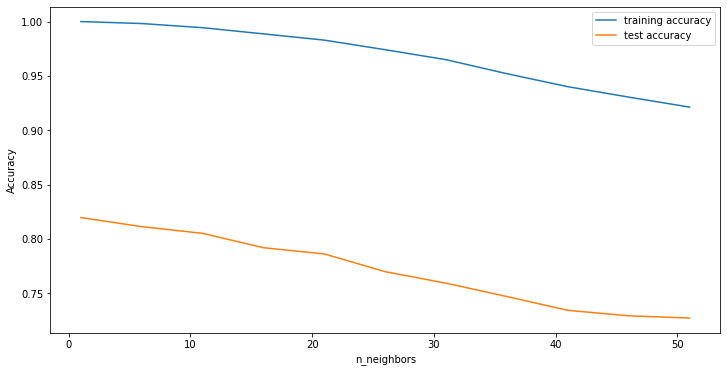

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 50
depth = range(1,52,5)
for n in depth:
    knn = Pipeline([('reduce_dims', PCA(n_components=113)),
                    ('model', KNeighborsClassifier(n_neighbors=n))])

    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_neighbors")
plt.legend()


### **Storing Results:**

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.
storeResults('K-Nearest Neighbors',acc_train_knn, acc_test_knn)

### **Storing Model:**

In [ ]:
# storing model for future use
import joblib
joblib.dump(knn,'model/kneighbors_model')

['model/kneighbors_model']

Actual Label :  E
Predicted Label :  P


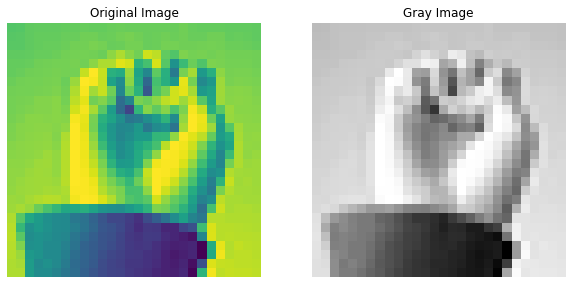

In [ ]:
# Checking Image for Actual and Preicted Label
Show_Test_Image(632,y_test_knn)

Actual Label :  Q
Predicted Label :  K


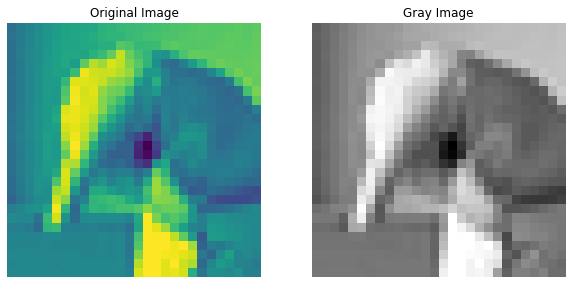

In [ ]:
# Checking Image for Actual and Preicted Label
Show_Test_Image(5432,y_test_knn)

### **OBSERVATIONS:**
The difference between performance on the training set and the testing set for n_neighbors < 10 is not much high. After that, the difference is increases and lead to overfitting of model.

### **Comparision of Models:**
To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [ ]:
#creating dataframe
result = pd.DataFrame({ 'ML Model': ML_Model,
                        'Train Accuracy': acc_train,
                        'Test Accuracy': acc_test,})

In [ ]:
# dispalying total result
result

,ML Model,Train Accuracy,Test Accuracy
0,Logistic Regression,0.999,0.680
1,Decision Tree,0.996,0.396
2,Support Vector Machine,1.000,0.853
3,Random Forest,1.000,0.773
4,Naive Bayes,0.794,0.620
5,K-Nearest Neighbors,0.999,0.815


In [ ]:
#Sorting the datafram on accuracy
sorted_result=result.sort_values(by=['Test Accuracy', 'Train Accuracy'],ascending=False).reset_index(drop=True)

In [ ]:
# dispalying total result
sorted_result

,ML Model,Train Accuracy,Test Accuracy
0,Support Vector Machine,1.000,0.853
1,K-Nearest Neighbors,0.999,0.815
2,Random Forest,1.000,0.773
3,Logistic Regression,0.999,0.680
4,Naive Bayes,0.794,0.620
5,Decision Tree,0.996,0.396


### **OBSERVATIONS**:
Among all the trained models, Support Vector Machine is giving better accuracy for training as well as testing dataset. It is understandable because this model is very good in classification.

### **Conclusion:**
1.We have successfully implement and test various Classifier model and classify Images in American Sign Language.

2.Thus with the help of Various Classifier, it is possible to construct the model with accuracy above 85%.

3.Though there are still some limitations to these model, more different types of methods are possible.